In [1]:
'''
This analysis analyze the amount of video sales for each company company over the years.
'''

'\nThis analysis analyze the amount of video sales for each company company over the years.\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
ROOT_DIR = "../Datasets"

ds_path = os.path.join(ROOT_DIR, "vgsales-12-4-2019-short.csv")
df = pd.read_csv(ds_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


In [4]:
# only keep columns of interest 
df1 = df[['Publisher', 'Year']]
df1

,Publisher,Year
0,Nintendo,2006.0
1,Nintendo,1985.0
2,Nintendo,2008.0
3,PUBG Corporation,2017.0
4,Nintendo,2009.0
...,...,...
55787,505 Games,2019.0
55788,Mooneye Studios,2019.0
55789,Mooneye Studios,2019.0
55790,Mooneye Studios,2019.0


In [5]:
# Check number of null values in ds
df1.isnull().sum()

Publisher      0
Year         979
dtype: int64

In [6]:
# Drop the null values in year
df1 = df1.dropna(axis=0, how='any')
df1.isnull().sum()

Publisher    0
Year         0
dtype: int64

In [7]:
# Convert Year to integer values
df1 = df1.astype({"Year": int})
df1.iloc[:,1].unique()

array([2006, 1985, 2008, 2017, 2009, 1998, 1989, 2010, 2007, 2005, 2000,
       1991, 2013, 2014, 2004, 2011, 1990, 2003, 2002, 2016, 2015, 2001,
       1999, 2018, 2012, 1996, 1992, 1993, 1997, 1994, 1982, 1988, 1987,
       1995, 1981, 1986, 1978, 1983, 2020, 1984, 1977, 2019, 1980, 1970,
       1979, 1975, 1973])

In [8]:
df1

,Publisher,Year
0,Nintendo,2006
1,Nintendo,1985
2,Nintendo,2008
3,PUBG Corporation,2017
4,Nintendo,2009
...,...,...
55786,Campo Santo,2019
55787,505 Games,2019
55788,Mooneye Studios,2019
55789,Mooneye Studios,2019


In [9]:
df2 = df1.to_numpy()
df2

array([['Nintendo', 2006],
       ['Nintendo', 1985],
       ['Nintendo', 2008],
       ...,
       ['Mooneye Studios', 2019],
       ['Mooneye Studios', 2019],
       ['Mooneye Studios', 2019]], dtype=object)

In [10]:
# function that convert df1 to mydict = {publisher: {year:count, year2:count2, ...}}
# total = {publisher, total count of all years}


def conversion(df):
    mydict = {}
    total = {}
    for i in range(len(df)):
        publisher = df[i][0]
        year = df[i][1]

            
        if publisher not in total:
            total[publisher] = 1  
        else: 
            total[publisher] += 1
    
    sorted_total = sorted(total.items(), key=lambda kv: kv[1], reverse=True)
    sorted_total = dict(sorted_total[:10])
    
    for i in range(len(df)):
        publisher = df[i][0]
        year = df[i][1]
        
        
        if publisher not in sorted_total: continue
#         print("hey")
        if publisher not in mydict:
            mydict[publisher] = {year: 1}
        elif year not in mydict[publisher]:
            mydict[publisher][year] = 1
        else:
            mydict[publisher][year] += 1
        
    return mydict, sorted_total

df_dict, tot = conversion(df2)

for k in df_dict:
    print(k, df_dict[k])
    print("\n")

# print(type(tot))
# print(tot.keys())
            

Nintendo {2006: 78, 1985: 18, 2008: 61, 2009: 145, 1998: 24, 1989: 17, 2007: 93, 2005: 48, 2000: 31, 1991: 16, 2011: 58, 1990: 21, 2013: 37, 2003: 29, 2016: 33, 2017: 37, 1999: 25, 2014: 54, 2012: 36, 2010: 93, 2018: 32, 2004: 72, 1996: 23, 1992: 20, 1993: 18, 1997: 20, 1994: 22, 1988: 15, 2001: 28, 1987: 15, 2002: 25, 1995: 27, 2015: 35, 1986: 16, 1983: 2, 1984: 2, 2019: 23, 2020: 1, 1975: 1}


Unknown {2004: 73, 2011: 529, 2010: 260, 2005: 66, 2015: 153, 2009: 239, 2016: 71, 1998: 50, 2013: 141, 2014: 555, 1997: 50, 2001: 72, 1983: 49, 1996: 45, 2020: 149, 2000: 65, 2008: 124, 1993: 46, 2006: 98, 2003: 69, 2007: 127, 1999: 47, 1992: 42, 2017: 59, 2002: 67, 2012: 101, 1980: 6, 1982: 40, 1970: 89, 1995: 73, 2018: 82, 1994: 57, 2019: 43, 1986: 13, 1989: 44, 1984: 10, 1990: 28, 1988: 13, 1987: 18, 1991: 34, 1981: 4, 1978: 4, 1985: 5, 1979: 2, 1977: 1, 1973: 1}


Activision {2015: 42, 2011: 96, 2010: 106, 2012: 57, 2009: 161, 2017: 10, 2013: 47, 2007: 100, 2018: 14, 2016: 29, 2014: 51, 20

In [11]:
# sort each publisher's year
for publisher in df_dict:
    new_dict = sorted(df_dict[publisher].items(), key=lambda kv: kv[0])
    df_dict[publisher] = dict(new_dict)

    
for k in df_dict:
    print(k, df_dict[k])
    print("\n")
    

Nintendo {1975: 1, 1983: 2, 1984: 2, 1985: 18, 1986: 16, 1987: 15, 1988: 15, 1989: 17, 1990: 21, 1991: 16, 1992: 20, 1993: 18, 1994: 22, 1995: 27, 1996: 23, 1997: 20, 1998: 24, 1999: 25, 2000: 31, 2001: 28, 2002: 25, 2003: 29, 2004: 72, 2005: 48, 2006: 78, 2007: 93, 2008: 61, 2009: 145, 2010: 93, 2011: 58, 2012: 36, 2013: 37, 2014: 54, 2015: 35, 2016: 33, 2017: 37, 2018: 32, 2019: 23, 2020: 1}


Unknown {1970: 89, 1973: 1, 1977: 1, 1978: 4, 1979: 2, 1980: 6, 1981: 4, 1982: 40, 1983: 49, 1984: 10, 1985: 5, 1986: 13, 1987: 18, 1988: 13, 1989: 44, 1990: 28, 1991: 34, 1992: 42, 1993: 46, 1994: 57, 1995: 73, 1996: 45, 1997: 50, 1998: 50, 1999: 47, 2000: 65, 2001: 72, 2002: 67, 2003: 69, 2004: 73, 2005: 66, 2006: 98, 2007: 127, 2008: 124, 2009: 239, 2010: 260, 2011: 529, 2012: 101, 2013: 141, 2014: 555, 2015: 153, 2016: 71, 2017: 59, 2018: 82, 2019: 43, 2020: 149}


Activision {1970: 1, 1980: 5, 1981: 6, 1982: 11, 1983: 25, 1984: 16, 1985: 4, 1986: 5, 1987: 5, 1988: 11, 1989: 15, 1990: 8, 19

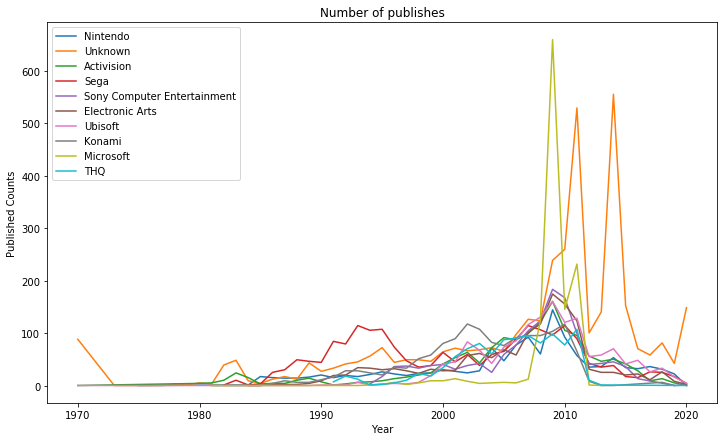

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))

for publisher in df_dict:
    years = []
    counts = []
    for k in df_dict[publisher]:
#         print(k)
        years.append(k)
        counts.append(df_dict[publisher][k])
        
        
    ax.plot(years, counts, label=publisher)
    

# for temp in range(len(pdf)):
#     pdf
#     dat = data[data['template']==temp]
#     dates =  dat['date']
#     dates_f = [dt.datetime.strptime(date,'%Y%m%d') for date in dates]
#     ax.plot(dates_f, dat['score'], label = pdf[temp])
    
# ax.plot(df1['Publisher'], df1['Year'])
    

plt.xlabel("Year")
plt.ylabel("Published Counts")
plt.title("Number of publishes")
ax.legend()
plt.show()

In [13]:
pdf = df1.groupby("Publisher").count()
pdf

,Year
Publisher,
100 Gates,2
10TACLE Studios,6
10tons,7
10tons Ltd,32
11 bit studios,30
...,...
tono / Ctrl+k,1
tri-Ace,1
uClick,2


In [14]:
df3 = pdf.to_numpy()
df3

array([[2],
       [6],
       [7],
       ...,
       [2],
       [4],
       [1]])